#### Cuales son las habilidades mas demandas para los 3 puestos mas famosos de trabajo en ciencia de datos?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns

df = pd.read_csv(r'C:\Users\Territorio DSC\Desktop\Python codes\Python practices - Data science\data_jobs.csv')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Limpiar columna de skills
def parse_job_skills(skills):
    if pd.notna(skills):
        return ast.literal_eval(skills)
    return skills

# Aplicar la función a la columna
df['job_skills'] = df['job_skills'].apply(parse_job_skills)

# Se emplea el metodo explode para separar las habiliades individualmente
df_exploted = df.explode('job_skills').copy()

In [2]:
# Se extraen los empleos mas demandados
empleos = df_exploted.value_counts(subset = 'job_title_short', ascending = False).head(3).index
empleos = empleos.sort_values(ascending = True)

# Se filtra el dataframe para los 3 empleos mas demandados y que sean de USA
df_exploted = df_exploted[(df_exploted['job_title_short'].isin(empleos)) & 
            (df_exploted['job_country'] == 'United States')]

In [3]:
# Se hace un group by para agrupar las habilidades mas demandadas
skills_groupby = df_exploted.groupby(['job_skills', 'job_title_short']).agg('size').reset_index(name = 'Total')

skills_groupby = skills_groupby.sort_values(by = 'Total', ascending = False)

skills_groupby.set_index('job_skills')

,job_title_short,Total
job_skills,,
python,Data Scientist,42379
sql,Data Analyst,34452
sql,Data Scientist,30034
excel,Data Analyst,27519
r,Data Scientist,26022
...,...,...
mattermost,Data Scientist,1
clickup,Data Scientist,1
shogun,Data Scientist,1


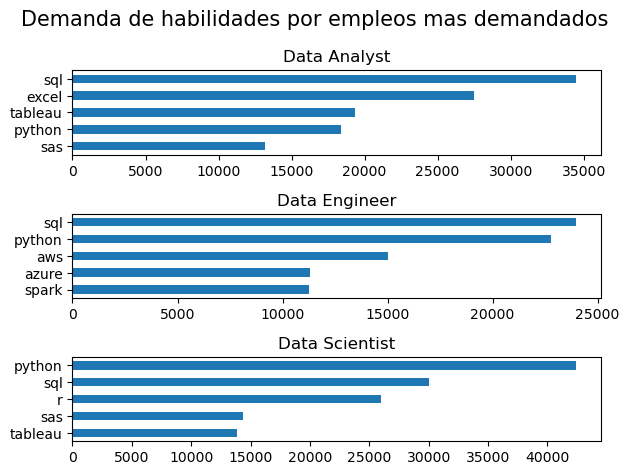

In [4]:
# Graficamos el ejercicio
fig, ax = plt.subplots(len(empleos), 1)

for i, empleo in enumerate(empleos):
    df_plot = skills_groupby[skills_groupby['job_title_short'] == empleo].head(5)
    df_plot[::-1].plot(kind = 'barh',
                 x = 'job_skills',
                 y = 'Total',
                 ax = ax[i],
                 title = empleo,
                 legend = False)
    ax[i].set_ylabel('')
    
fig.suptitle('Demanda de habilidades por empleos mas demandados', fontsize = 15)
plt.tight_layout()
plt.show()

##### Ahora haremos lo mismo pero convirtiendo los resultados en porcentajes

para esto necesitaremos dividir el numero total de un empleo por habilidad y dividirlo entre el total de empleos

% skill in a job posting = (skill count in job posting) / (Total count of job posting)

In [5]:
# Obtenemos la cantidad de empleos en USA
df_USA = df[df['job_country'] == 'United States']

df_job_title_count = df_USA.value_counts('job_title_short').reset_index(name = 'Empleos totales')

df_job_title_count

,job_title_short,Empleos totales
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [6]:
# Hacemos un merge para agregar dicha cantidad del total de empleos al dataframe que utilizamos (skills_groupby)
df_merge = pd.merge(skills_groupby, df_job_title_count, how = 'left', on = 'job_title_short')

df_merge['%'] = ((df_merge['Total']) / (df_merge['Empleos totales'])) * 100

df_merge

,job_skills,job_title_short,Total,Empleos totales,%
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
662,mattermost,Data Scientist,1,58830,0.001700
663,clickup,Data Scientist,1,58830,0.001700
664,shogun,Data Scientist,1,58830,0.001700
665,chainer,Data Analyst,1,67816,0.001475


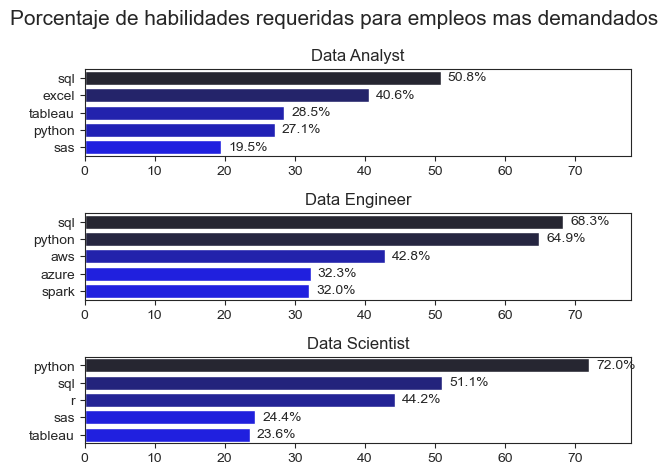

In [31]:
# Y graficamos
fig, ax = plt.subplots(len(empleos), 1)

for i, empleo in enumerate(empleos):
    df_plot = df_merge[df_merge['job_title_short'] == empleo].head(5)
    # df_plot[::-1].plot(kind = 'barh',
    #              x = 'job_skills',
    #              y = '%',
    #              ax = ax[i],
    #              title = empleo,
    #              legend = False)

    #Usando seaborn
    sns.barplot(data = df_plot,
                x = '%',
                y = 'job_skills',
                ax = ax[i],
                legend = False,
                hue = '%',
                palette = 'dark:b_r')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_title(empleo)
    ax[i].set_xlim(0, 78)

    # Agregar valores de datos para cada barra
    for index, valor in enumerate(df_plot['%']):
        ax[i].text(valor + 1, # + 1 es para alejar el valor de la barra ("valor" es un parametro que igual debe ir)
                    index,
                    f'{round(valor,1)}%',
                    va = 'center') # Para centrar el valor a la barra
    
fig.suptitle('Porcentaje de habilidades requeridas para empleos mas demandados', fontsize = 15)
sns.set_style('ticks')
plt.tight_layout()
plt.show()